In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [15]:
df = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [27]:
df.columns

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp'], dtype='object')

In [16]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11824 non-null  float64
 2   tmin    10505 non-null  float64
 3   tmax    11265 non-null  float64
 4   prcp    7274 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB
None
               tavg          tmin          tmax         prcp
count  11824.000000  10505.000000  11265.000000  7274.000000
mean      23.840426     19.385131     29.932827     4.414119
std        2.309899      2.367239      2.957866    12.994655
min       17.200000      9.300000     19.800000     0.000000
25%       22.300000     18.100000     27.900000     0.000000
50%       23.500000     19.800000     29.500000     0.000000
75%       25.200000     20.800000     32.000000     2.000000
max       32.400000     27.900000     39.200000   271.300000
time       0
tavg      70

In [18]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
print(df['time'].head())

0   1990-01-01
1   1990-01-02
2   1990-01-03
3   1990-01-04
4   1990-01-05
Name: time, dtype: datetime64[ns]


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
# Drop non-numeric columns for statistical analysis
numeric_df = df.select_dtypes(include=[np.number])

# Now safe to do:
stats = numeric_df.describe()
correlation = numeric_df.corr()


In [21]:
df.isnull().sum()

,0
time,0
tavg,70
tmin,1389
tmax,629
prcp,4620


In [22]:
from sklearn.impute import SimpleImputer

# List of columns to impute
columns_to_impute = ['tavg', 'tmin', 'tmax', 'prcp']

# Initialize imputer
imputer = SimpleImputer(strategy='mean')

# Apply imputer
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Confirm no more missing values
print(df[columns_to_impute].isnull().sum())


tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64


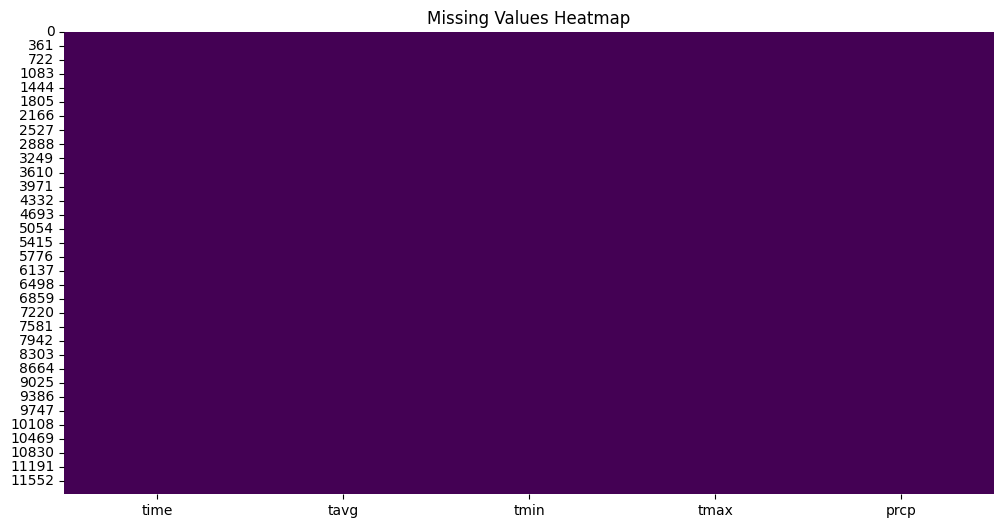

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


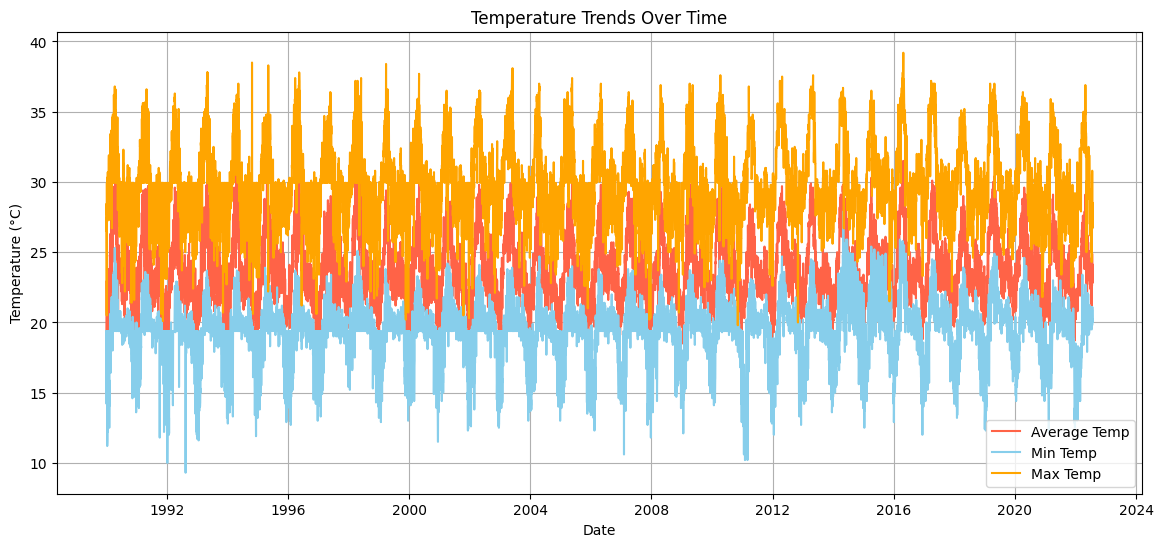

In [28]:
plt.figure(figsize=(14,6))
plt.plot(df['time'], df['tavg'], label='Average Temp', color='tomato')
plt.plot(df['time'], df['tmin'], label='Min Temp', color='skyblue')
plt.plot(df['time'], df['tmax'], label='Max Temp', color='orange')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

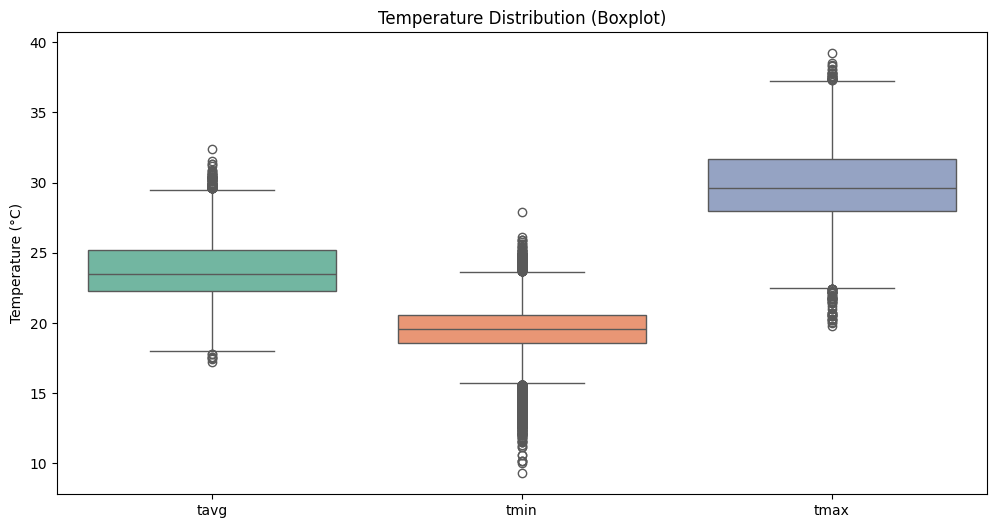

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['tavg', 'tmin', 'tmax']], palette='Set2')
plt.title('Temperature Distribution (Boxplot)')
plt.ylabel('Temperature (°C)')
plt.show()


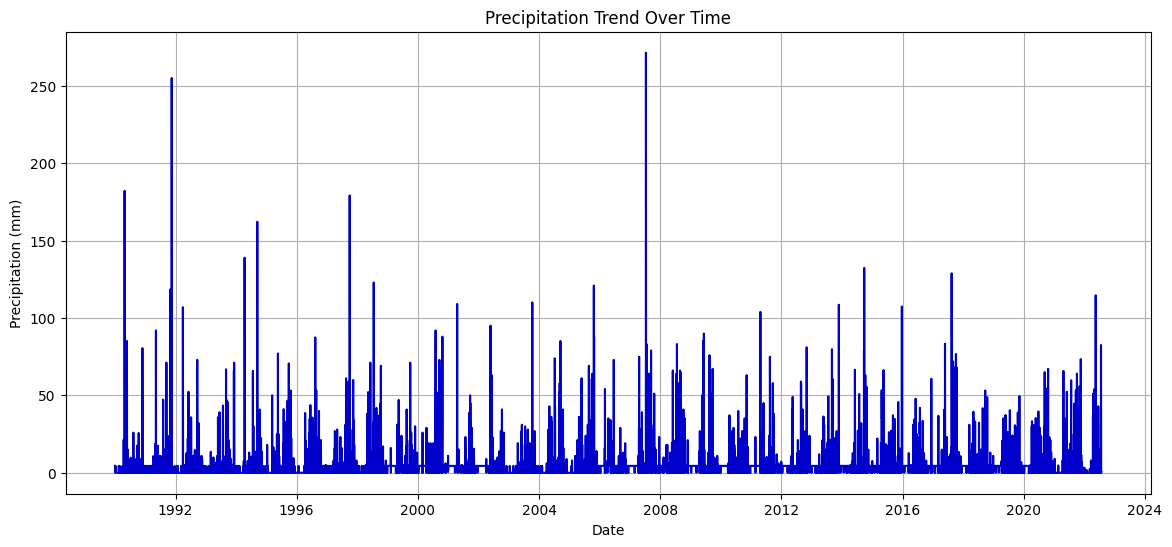

In [32]:
plt.figure(figsize=(14,6))
plt.plot(df['time'], df['prcp'], color='mediumblue')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Trend Over Time')
plt.grid(True)
plt.show()

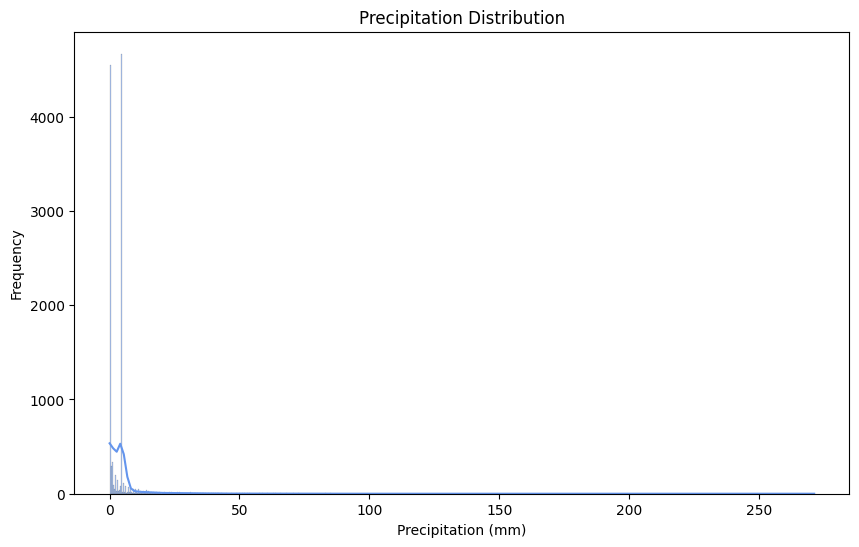

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df['prcp'], kde=True, color='cornflowerblue')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

In [34]:
import plotly.express as px

fig = px.line(df, x='time', y=['tavg', 'tmin', 'tmax'],
              labels={'value':'Temperature (°C)', 'variable':'Type'},
              title='Interactive Temperature Trends')
fig.update_layout(template='plotly_dark')
fig.show()

In [35]:
fig = px.line(df, x='time', y='prcp', title='Interactive Precipitation Over Time',
              labels={'prcp': 'Precipitation (mm)'})
fig.update_layout(template='plotly_dark')
fig.show()


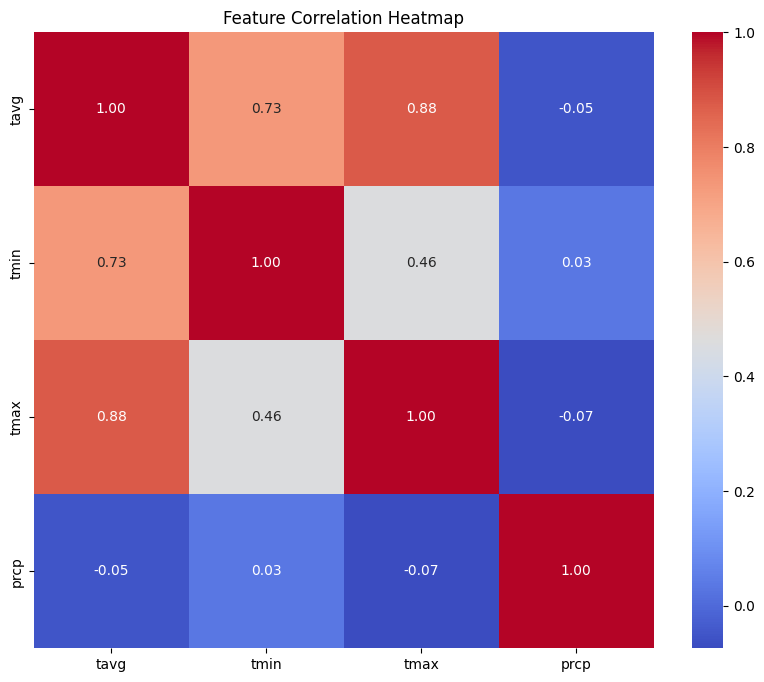

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()
